# Let's plot some vowel spaces!

## 1. Get the code set up

### Run everything in this section first!
In these cells, we
1. Import the libraries and packages we'll be using
2. Define a few functions we'll use to plot and normalize vowels

Editing these cells will have an impact on the rest of the code in the notebook, so do so carefully!

In the next sections we'll

1. Import data
2. Visualize some examples
3. Normalize the data 


In [1]:
#Import libraries

import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

In [2]:
def vowelplot (vowelcsv, color=None, F1="F1", F2="F2", vowel="Vowel", title="Vowel Plot", unit="Hz", logscale=True):
  
    #Set some parameters for the chart itself
    sns.set(style='ticks', context='notebook')
    plt.figure(figsize=(6,6))
    
    # If there's an argument for color, determine whether it's likely to be categorical
    ## If it's a string (text), use a categorical color palette
    ## If it's a number, use a sequential color palette
    if color != None:
        if type(vowelcsv[color].iloc[0])==str:
            pal = "husl"
        else:
            pal = "viridis"
            
        pl = sns.scatterplot(x = F2,
                             y = F1,
                             hue = color,
                             data = vowelcsv,
                             palette = pal)
        
    # If no color argument is given, don't specify hue, and no palette needed
    else:
        pl = sns.scatterplot(x = F2,
                             y = F1,
                             data = vowelcsv)
    
    
    #Invert axes to correlate with articulatory space!
    pl.invert_yaxis()
    pl.invert_xaxis()
    
    #Add unit to the axis labels
    F1name = str("F1 ("+unit+")")
    F2name = str("F2 ("+unit+")")
    laby = plt.ylabel(F1name)
    labx = plt.xlabel(F2name)

    if logscale == True:
        pl.loglog()
        pl.yaxis.set_major_formatter(ticker.ScalarFormatter())
        pl.yaxis.set_minor_formatter(ticker.ScalarFormatter())
        pl.xaxis.set_major_formatter(ticker.ScalarFormatter())
        pl.xaxis.set_minor_formatter(ticker.ScalarFormatter())
    
    # Add vowel labels
    
    if vowel != None: 
        for line,row in vowelcsv.iterrows():
            pl.text(vowelcsv[F2][line]+0.1,
                    vowelcsv[F1][line],
                    vowelcsv[vowel][line],
                    horizontalalignment = 'left',
                    size = 14, # Edit for larger plots!
                    color = 'black',
                   # weight = 'semibold' # Uncomment for larger plots!
                   )
    
    pl.set_title(title)
    plt.show()
    
    return pl



def barkify (data, formants):
    # For each formant listed, make a copy of the column prefixed with z
    for formant in formants:
        for ch in formant:
            if ch.isnumeric():
                num = ch
        formantchar = (formant.split(num)[0])
        name = str(formant).replace(formantchar,'z')
        # Convert each value from Hz to Bark
        data[name] = 26.81/ (1+ 1960/data[formant]) - 0.53
    # Return the dataframe with the changes
    return data

def Lobify (data, group, formants):
    zscore = lambda x: (x - x.mean()) / x.std()
    for formant in formants:
        name = str("zsc_" + formant)
        col = data.groupby([group])[formant].transform(zscore)
        data.insert(len(data.columns), name, col)
    return data 

## 2. Import data
This expects a CSV file (comma separated values) with the following columns. 

- "F1": F1 value in Hz
- "F2": F2 value in Hz
- "Vowel": transcription or label for vowel

If your columns aren't named exactly like this, that's okay! <br>
**But** you'll need to be sure to provide the *exact* names of your columns when you make the plot!

You may also have other values, which you can use to label your plot:

- F3
- Token
- Speaker

### To import your data
Make sure that the name of the file is correct! When we import the data, we'll also have to give our dataframe a name, which will go on the left side of the =. When we need to do something to our data, this is the name we'll use in the code, not the name of our csv! If your csv is in the same folder as this notebook, the code should look like the example below, with the name of your file in quotes within the parentheses. 

```python
voweldata = pd.read_csv('NameOfFile.csv')
```

If the csv is somewhere else, you'll have to get more specific, for example:
```python
voweldata = pd.read_csv('MainFolder//NameOfFile.csv')
```

For this example, let's load in some vowel data from Flege 1994. Thanks to Prof Keith Johnson for suggesting this dataset and doing some pre-processing to make it work with this function! This is a rich dataset that will let us visualize a lot of different features

#### Import Flege 1994 as F94
Let's preview the data to confirm we loaded the data and make sure everything is as we expect. We can use ```df.sample()``` or ```df.head()```, where df is the name of your dataframe. ```df.sample()``` will give you random rows, while ```df.head()``` will give you the first rows.

In [3]:
F94 = pd.read_csv('Flege_94_vowels.csv')

In [4]:
F94.sample(5)

,lg,Vowel,Ss,point,VOT,dur,F0,F1,F2,F3
53,English,a,3,offset,4,110,172,619,1209,1955
64,Spanish,i,1,midpoint,16,191,78,354,2238,2576
81,Spanish,a,1,onset,17,166,110,517,1195,2591
33,English,ɛ,3,onset,2,114,118,452,1466,2395
51,English,a,3,onset,4,110,172,551,1136,1857


In [5]:
F94.head(5)

,lg,Vowel,Ss,point,VOT,dur,F0,F1,F2,F3
0,English,i,1,onset,10,119,131,312,2205,2726
1,English,i,1,midpoint,10,119,131,317,2299,2897
2,English,i,1,offset,10,119,131,320,2257,2829
3,English,i,2,onset,13,93,130,304,1995,2383
4,English,i,2,midpoint,13,93,130,281,2079,2516


## 3. Plot vowels!

### The shortest line of  code

That you can use to make a plot only gives the name of your data.


- This will only work if your F1 column is called exactly "F1", your F2 column is called exactly "F2", and your Vowel column is called "Vowel"

```python
vowelplot(voweldata)
```

- *If your columns have different names* be sure to provide them using 

```python
vowelplot(voweldata,
          F1 = "YOUR F1 NAME",
          F2 = "YOUR F2 NAME",
          vowel = "YOUR VOWEL NAME")
```

- This will plot a your data in F1-F2 space, with all points the same color

### The longest line of code
You could use, if you specified every single argument, is: 

```python
vowelplot(voweldata, 
          color = "MY COLOR CHOICE", 
          F1 = "MY F1 NAME", 
          F2 = "MY F2 NAME", 
          vowel = "MY VOWEL NAME", 
          title = "MY TITLE", 
          unit = "MY FORMANT UNIT", 
          logscale=True/False)
```

- These other arguments are all optional.
    1. color: What would you like color to represent?
        - Don't forget to put this term in quotes!
        - This needs to be the exact name, including capitalization, of the name of the column in your spreadsheet
    2. title: Add a title for your plot!
        - If you don't specify anyhing, your plot will be called "Vowel Plot"
        - If you don't want any title, use ```title = None```
    3. logscale: Do you want the axes to be on a log scale?
        - The log scale is closer to how we perceive sound, so it may be more informative
        - use ```logscale = True``` to use the log for your axes
        - use ```logscale = False``` to use non-transformed axes

- The ```vowel``` argument adds labels to each point and can also be used in other ways:
    - Use ```vowel = None``` to remove all labels from the points (for example, if you want to use only color to distinguish between vowels)
    - Use the name of a different column to label points with that feature instead (for example, if they're tokens of the same vowel in different contexts)


### Demos with Flege 1994

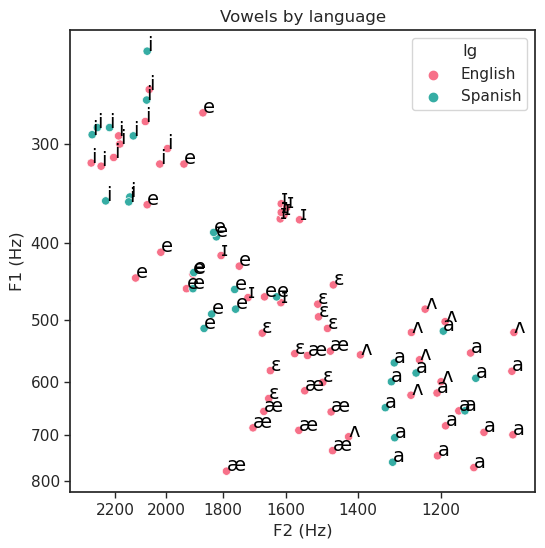

<AxesSubplot:title={'center':'Vowels by language'}, xlabel='F2 (Hz)', ylabel='F1 (Hz)'>

In [6]:
vowelplot(F94,
          color = "lg",
          title = "Vowels by language",
          logscale = True)

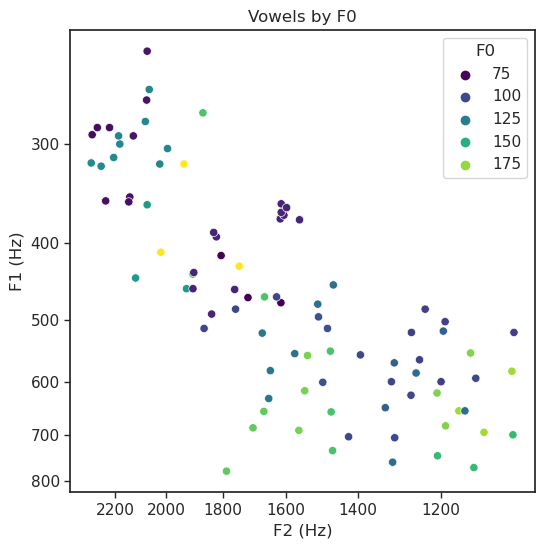

<AxesSubplot:title={'center':'Vowels by F0'}, xlabel='F2 (Hz)', ylabel='F1 (Hz)'>

In [7]:
vowelplot(F94,
          color = "F0",
          vowel = None,
          title = "Vowels by F0",
          logscale = True)

## 4. Import and plot your data! 
Remember:
- If your data isn't in the same folder as this notebook, you'll need to include the path
- The function we defined expects some defaults. If your plot is different from that, you need to specify those arguments! For example
    - If your vowel column is called V, include ```vowel = "V"```
    - If you want to label it Figure 1, include ```title = "Figure 1"```
    - If you don't want the axes to be normalized, include ```logscale = False```
    - If you want to color code by F0, include ```color = "F0"```

In [8]:
voweldata = pd.read_csv('demo-vowels.csv') # Replace 'demo-vowels.csv'!
voweldata.sample(5)

,carrier1,word,carrier2,Vowel,F1,F2,F3
2,say,hayed,again,e,666,2350,3576
1,say,hid,again,ɪ,484,2271,3304
0,say,heed,again,i,323,2692,3401
7,say,hud,again,ʌ,985,1644,3117
8,say,hoed,again,o,550,1050,3250


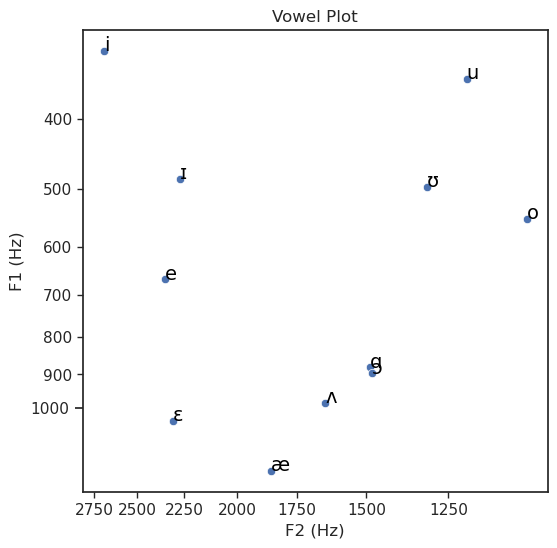

<AxesSubplot:title={'center':'Vowel Plot'}, xlabel='F2 (Hz)', ylabel='F1 (Hz)'>

In [9]:
vowelplot(vowelcsv = voweldata,
          color = None,
          F1 = "F1",
          F2 = "F2",
          vowel = "Vowel",
          title = "Vowel Plot",
          unit = "Hz",
          logscale = True)

## 5. Normalizing data 
When you ran the cells in the "get the code set up" section, you also defined some code for normalizing data. 

There are two kinds of normalizing we'll consider:
- **Psychoacoustic normalizing** to convert Hz to Bark.
    - This is similar to using the log scale for the axes--I wouldn't do both!
    - This psychoacoustic scale is better at capturing the non-linear perception of frequencies.
        - That is, the perceptual difference between 100 and 200 Hz is perceived as greater than the difference between 2100 and 2200 Hz
        - The perceptual difference between Bark is more uniform
    - Using Bark values will produce a plot that looks more like the IPA vowel chart
- **Lobanov normalizing** to compare whole vowel systems
    - Because everyone's individual formant values vary so much, it can be hard to compare raw formant values across speakers
    - Taking the z-score of each formant relative to some category, usually a speaker, lets us focus on how the two vowel systems compare overall
    - In other words, it gives us a picture of the shape of someone's vowel space
    - This is how we can make statements about one person's \[u\] being more fronted than another's, for example
    - For this to work well, you need to have *complete vowel spaces* for each speaker
  
    
Let's try normaling the Flege 94 data both ways and visualizing the results

### Convert F1 and F2 to Bark using ```barkify```

- To use barkify, we need to give it the name of our data, and a list of the columns we want to convert
- In Python, a list goes withins square brackets ```[] ``` with each item separated by a comma
- The new columns will have 'z' in front of the number, instead of 'F,' for example

Let's try converting F1 and F2 of Flege 94 to Bark and visualizing the results

```
barkify(voweldata, ["formant","formant"...])
```


In [10]:
barkify(F94, ["F1","F2"])
F94.head()

,lg,Vowel,Ss,point,VOT,dur,F0,F1,F2,F3,z1,z2
0,English,i,1,onset,10,119,131,312,2205,2726,3.151655,13.663529
1,English,i,1,midpoint,10,119,131,317,2299,2897,3.202442,13.941986
2,English,i,1,offset,10,119,131,320,2257,2829,3.232807,13.819104
3,English,i,2,onset,13,93,130,304,1995,2383,3.069929,12.993628
4,English,i,2,midpoint,13,93,130,281,2079,2516,2.831718,13.269948


#### Plot the data 
Be sure to update your arguments! We've changed three things about the data that we need to pay attention to for the code to run and our plot to be accurate:
- ```F1, F2```: The name of our F1 and F2 columns are different and need to be specified in order for the code to run
- ```unit```: The unit has changed, so the axes need to be updated in order for our plot to be accurate
- ```logscale```: The scale has changed, from Hz to Bark, so it no longer makes sense to log transform the axes


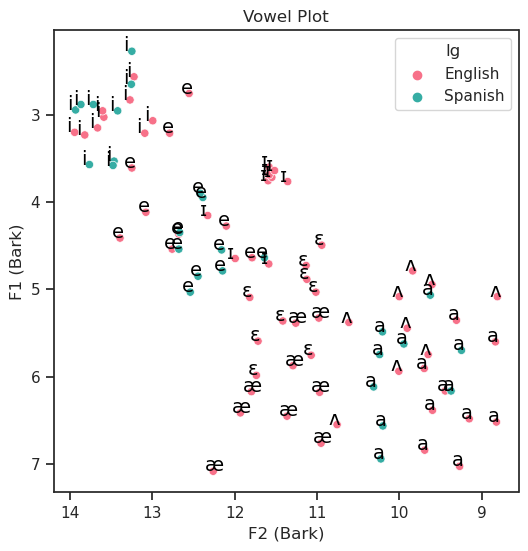

<AxesSubplot:title={'center':'Vowel Plot'}, xlabel='F2 (Bark)', ylabel='F1 (Bark)'>

In [11]:
vowelplot(F94,
          F1 = "z1",
          F2 = "z2",
          color = "lg",
          unit = "Bark",
          logscale = False)

### Lobanov normalize vowel spaces by Ss using ```Lobify```
Next, lets try normalizing the vowel spaces based on Ss so that we can compare the vowel spaces for each <br>
To use ```Lobify``` we need to specify:
- data: the data we want to transform
- group: the category we want to compare vowel spaces by (usually speaker)
- formants: a list of the formant values we want to normalize

```python
Lobify(voweldata, 
       group = "GROUP",
       formants = ["formant1","formant2"...]
      )
```

This will add a column for each formant with 'zsc_' (for 'z-score') in front of the formant name.

#### Subsetting
Before we normalize the data, let's also subset it so that we're only looking at English<br>
Let's also only look at the midpoint of each vowel.<br>
This way we'll have just one F1 and F2 value for each Ss-vowel pair.

1 condition
```New_Data = Old_Data[Old_Data.Column=="Category To Keep"]```

2 or more conditions<br>
```New_Data = Old_Data[(Old_Data.Column=="Category To Keep") & Old_Data.SecondColumn=="Category To Keep"])```

In [12]:
F94_2 = F94[(F94.point=="midpoint") & (F94.lg=="English")]

In [13]:
F94_2 = Lobify(F94_2,
       group = "Ss",
       formants = ["z1","z2"]
      )
F94_2.sample(10)

,lg,Vowel,Ss,point,VOT,dur,F0,F1,F2,F3,z1,z2,zsc_z1,zsc_z2
58,English,ʌ,2,midpoint,19,87,95,599,1200,2367,5.745572,9.651013,0.487282,-1.079360
52,English,a,3,midpoint,4,110,172,681,1190,1968,6.383143,9.598222,1.012362,-1.219642
7,English,i,3,midpoint,7,109,129,300,2180,2628,3.028850,13.587343,-1.408034,1.461580
4,English,i,2,midpoint,13,93,130,281,2079,2516,2.831718,13.269948,-1.569002,1.357100
46,English,a,1,midpoint,10,115,155,769,1129,2161,7.024742,9.268799,0.983154,-1.639149
34,English,ɛ,3,midpoint,2,114,118,552,1575,2533,5.361369,11.415050,0.275069,0.001508
25,English,e,3,midpoint,7,114,195,411,2020,2508,4.117368,13.077085,-0.622579,1.118618
1,English,i,1,midpoint,10,119,131,317,2299,2897,3.202442,13.941986,-1.592593,1.330189
37,English,æ,1,midpoint,7,116,165,777,1788,2562,7.081023,12.259829,1.021081,0.261349
61,English,ʌ,3,midpoint,12,119,96,562,1249,2348,5.444314,9.904930,0.334920,-1.013493


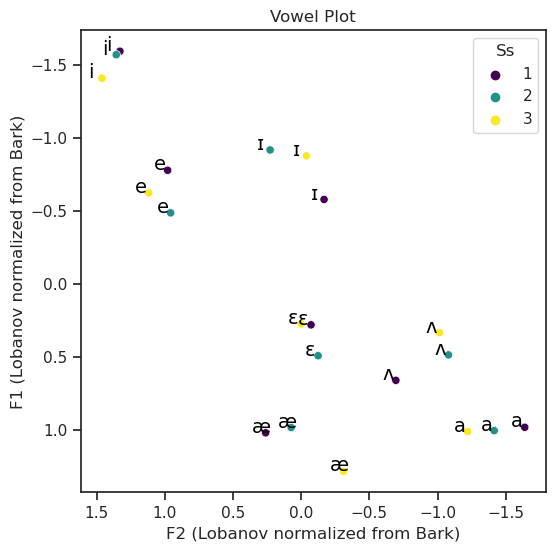

<AxesSubplot:title={'center':'Vowel Plot'}, xlabel='F2 (Lobanov normalized from Bark)', ylabel='F1 (Lobanov normalized from Bark)'>

In [14]:
vowelplot(F94_2,
          F1 = "zsc_z1",
          F2 = "zsc_z2",
          color = "Ss",
          unit = "Lobanov normalized from Bark",
          logscale = False)

## 6. Pseudocode recap

### To import a csv file (spreadsheet) with pandas
```
my_data = pd.read_csv('NameOfFile.csv')
```

### To plot your data

```python
vowelplot(my_data,
          color = "Column Name - color coding/hue", # use None for no color
          F1 = "Column Name - Y-axis", # can omit if column is called F1
          F2 = "Column Name - X-axis", # can omit column is called F2
          vowel = "Column Name - point label", # can omit if column is called "Vowel",
                                    # use vowel = None for no label
          title = "Title to go at top of plot", # can omit if title is "Vowel plot",
                                      # use title = None for no title
          unit = "Unit for axis labels", # can omit if unit is Hz
          logscale = True/False # can omit if logscale should be on
         )
```

### To convert Hz to Bark
```
my_data = barkify(my_data, ["Column Name - formant", "Column Name - formant"...])
```

### To Lobanov normalize by speaker

```python
my_data = lobify(my_data,
                 group = "Column Name - speaker or other grouping",
                 formants = ["Column Name - formant", "Column Name - formant"...]
                )
```